In [ ]:
# dict_ = {"n_neighbors": np.arange(1,200),
#         "weights" : ['uniform', 'distance'],
#         "algorithm" : ['auto', 'ball_tree', 'kd_tree', 'brute'],
#         "leaf_size" : np.arange(1,10)}

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
import os
import numpy as np
import ast
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [1]:
%config Completer.use_jedi = False

In [5]:
'assists', 'baronKills', 'bountyLevel', 'challenges', 'champExperience', 'champLevel', 'championId', 'championName', 'championTransform', 'consumablesPurchased', 'damageDealtToBuildings', 'damageDealtToObjectives', 'damageDealtToTurrets', 'damageSelfMitigated', 'deaths', 'detectorWardsPlaced', 'doubleKills', 'dragonKills', 'firstBloodAssist', 'firstBloodKill', 'firstTowerAssist', 'firstTowerKill', 'gameEndedInEarlySurrender', 'gameEndedInSurrender', 'goldEarned', 'goldSpent', 'individualPosition', 'inhibitorKills', 'inhibitorTakedowns', 'inhibitorsLost', 'item0', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6', 'itemsPurchased', 'killingSprees', 'kills', 'lane', 'largestCriticalStrike', 'largestKillingSpree', 'largestMultiKill', 'longestTimeSpentLiving', 'magicDamageDealt', 'magicDamageDealtToChampions', 'magicDamageTaken', 'neutralMinionsKilled', 'nexusKills', 'nexusLost', 'nexusTakedowns', 'objectivesStolen', 'objectivesStolenAssists', 'participantId', 'pentaKills', 'perks', 'physicalDamageDealt', 'physicalDamageDealtToChampions', 'physicalDamageTaken', 'profileIcon', 'puuid', 'quadraKills', 'riotIdName', 'riotIdTagline', 'role', 'sightWardsBoughtInGame', 'spell1Casts', 'spell2Casts', 'spell3Casts', 'spell4Casts', 'summoner1Casts', 'summoner1Id', 'summoner2Casts', 'summoner2Id', 'summonerId', 'summonerLevel', 'summonerName', 'teamEarlySurrendered', 'teamId', 'teamPosition', 'timeCCingOthers', 'timePlayed', 'totalDamageDealt', 'totalDamageDealtToChampions', 'totalDamageShieldedOnTeammates', 'totalDamageTaken', 'totalHeal', 'totalHealsOnTeammates', 'totalMinionsKilled', 'totalTimeCCDealt', 'totalTimeSpentDead', 'totalUnitsHealed', 'tripleKills', 'trueDamageDealt', 'trueDamageDealtToChampions', 'trueDamageTaken', 'turretKills', 'turretTakedowns', 'turretsLost', 'unrealKills', 'visionScore', 'visionWardsBoughtInGame', 'wardsKilled', 'wardsPlaced', 'win'

('assists',
 'baronKills',
 'bountyLevel',
 'challenges',
 'champExperience',
 'champLevel',
 'championId',
 'championName',
 'championTransform',
 'consumablesPurchased',
 'damageDealtToBuildings',
 'damageDealtToObjectives',
 'damageDealtToTurrets',
 'damageSelfMitigated',
 'deaths',
 'detectorWardsPlaced',
 'doubleKills',
 'dragonKills',
 'firstBloodAssist',
 'firstBloodKill',
 'firstTowerAssist',
 'firstTowerKill',
 'gameEndedInEarlySurrender',
 'gameEndedInSurrender',
 'goldEarned',
 'goldSpent',
 'individualPosition',
 'inhibitorKills',
 'inhibitorTakedowns',
 'inhibitorsLost',
 'item0',
 'item1',
 'item2',
 'item3',
 'item4',
 'item5',
 'item6',
 'itemsPurchased',
 'killingSprees',
 'kills',
 'lane',
 'largestCriticalStrike',
 'largestKillingSpree',
 'largestMultiKill',
 'longestTimeSpentLiving',
 'magicDamageDealt',
 'magicDamageDealtToChampions',
 'magicDamageTaken',
 'neutralMinionsKilled',
 'nexusKills',
 'nexusLost',
 'nexusTakedowns',
 'objectivesStolen',
 'objectivesStole

In [6]:
'damageDealtToObjectives'
'damageDealtToTurrets'
'detectorWardsPlaced'
'sightWardsBoughtInGame'
'totalDamageDealt'
'totalDamageDealtToChampions'
'totalTimeSpentDead'
'visionScore'
'visionWardsBoughtInGame'

'visionWardsBoughtInGame'

In [7]:
os.listdir()

['.ipynb_checkpoints',
 '1',
 '2',
 '3',
 '4',
 '930_matches_df_19_05',
 'Anaconda3-2021.11-Windows-x86_64.exe',
 'ATUS-1.1.0.0.exe',
 'BOTHPARCIAL',
 'BOTH_FEATURES tentativa2.ipynb',
 'BOTH_FEATURES.ipynb',
 'Collect_mastery_points.ipynb',
 'CSV data to dataset-kda.ipynb',
 'CSV data to dataset.ipynb',
 'CS_min.ipynb',
 'dados_lab_24_05.csv',
 'dados_lab_24_05.tsv',
 'Daniel A. Roberts, Sho Yaida - The Principles of Deep Learning Theory_ An Effective Theory Approach to Understanding Neural Networks.pdf',
 'desktop.ini',
 'df_correto_20features_839partidas_sem_erro',
 'df_final_provisorio',
 'df_prov_200_linhas',
 'eduroam-W10-U-UoSP-eduroam.exe',
 'Enunciado-EP1.pdf',
 'ep02_logreg (1).ipynb',
 'ep02_logreg.ipynb',
 'Experimentos 17_05 ML.ipynb',
 'Experimentos 27_05 ML.ipynb',
 'Extracting data from CSVs (1).ipynb',
 'filtropassivo.pdf',
 'finallllllcomtarget',
 'FOURIER QUADRADA.xlsx',
 'fts',
 'gabex1.py',
 'gabex2.py',
 'Gráficos_lab_3_11_05.ipynb',
 'H10_Síntese Atv. 1 Exp. 2 Gr

In [8]:
df = pd.read_csv('930_matches_df_19_05')
df

,Unnamed: 0,5th_CS_min_blue,4th_CS_min_blue,3rd_CS_min_blue,2nd_CS_min_blue,1st_CS_min_blue,5th_CS_min_red,4th_CS_min_red,3rd_CS_min_red,2nd_CS_min_red,...,4th_MP_blue,3rd_MP_blue,2nd_MP_blue,1st_MP_blue,5th_MP_red,4th_MP_red,3rd_MP_red,2nd_MP_red,1st_MP_red,target
0,0,1.976583,4.573580,4.756204,5.939718,6.626648,1.162788,4.747214,5.366882,5.895539,...,27869,28759,90591,139033,5702,6894,17226,60900,104796,1
1,1,3.867070,5.469181,5.623977,6.249752,6.870524,0.740881,3.587890,5.125936,5.649067,...,39489,230329,1140402,1173761,25119,39085,81033,120399,2342839,0
2,2,1.080000,4.598162,4.825763,5.340403,5.681439,2.085663,4.498963,4.766707,5.405575,...,18062,30808,35375,53165,1209,10990,11605,17510,1377402,1
3,3,0.363769,2.671286,4.984266,5.148903,5.976233,1.734322,5.071400,5.178816,6.166968,...,159593,191837,193851,292959,19550,47094,58443,87329,464856,0
4,4,1.368294,4.925813,5.484073,5.915913,6.164462,0.815051,5.392639,5.477247,6.682713,...,10714,15688,34450,101033,11441,11980,22250,52517,71398,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,925,0.206679,3.242855,3.858181,4.125231,5.436693,3.042890,4.194576,4.323031,4.890833,...,10650,35904,56382,495855,2743,66034,202130,709380,721154,1
926,926,1.513932,4.858114,5.456084,6.261634,6.332916,4.486468,4.896937,4.932086,5.188566,...,18754,85240,100878,543559,2092,3374,6775,12643,946303,1
927,927,1.941900,4.367879,4.490651,5.920417,6.566390,0.475627,3.839915,4.261205,5.287674,...,10958,37538,139703,150471,8974,9033,27138,152271,178701,0
928,928,1.697442,2.560060,5.208572,6.171789,6.474445,1.276204,5.618855,6.072157,6.331045,...,3571,11851,48540,381589,38679,65706,352602,394108,825205,1


In [9]:
df.columns

Index(['Unnamed: 0', '5th_CS_min_blue', '4th_CS_min_blue', '3rd_CS_min_blue',
       '2nd_CS_min_blue', '1st_CS_min_blue', '5th_CS_min_red',
       '4th_CS_min_red', '3rd_CS_min_red', '2nd_CS_min_red', '1st_CS_min_red',
       '5th_kda_blue', '4th_kda_blue', '3rd_kda_blue', '2nd_kda_blue',
       '1st_kda_blue', '5th_kda_red', '4th_kda_red', '3rd_kda_red',
       '2nd_kda_red', '1st_kda_red', '5th_MP_blue', '4th_MP_blue',
       '3rd_MP_blue', '2nd_MP_blue', '1st_MP_blue', '5th_MP_red', '4th_MP_red',
       '3rd_MP_red', '2nd_MP_red', '1st_MP_red', 'target'],
      dtype='object')

In [10]:
df = df.drop('Unnamed: 0',axis = 1)
df

,5th_CS_min_blue,4th_CS_min_blue,3rd_CS_min_blue,2nd_CS_min_blue,1st_CS_min_blue,5th_CS_min_red,4th_CS_min_red,3rd_CS_min_red,2nd_CS_min_red,1st_CS_min_red,...,4th_MP_blue,3rd_MP_blue,2nd_MP_blue,1st_MP_blue,5th_MP_red,4th_MP_red,3rd_MP_red,2nd_MP_red,1st_MP_red,target
0,1.976583,4.573580,4.756204,5.939718,6.626648,1.162788,4.747214,5.366882,5.895539,6.067965,...,27869,28759,90591,139033,5702,6894,17226,60900,104796,1
1,3.867070,5.469181,5.623977,6.249752,6.870524,0.740881,3.587890,5.125936,5.649067,6.146694,...,39489,230329,1140402,1173761,25119,39085,81033,120399,2342839,0
2,1.080000,4.598162,4.825763,5.340403,5.681439,2.085663,4.498963,4.766707,5.405575,6.289723,...,18062,30808,35375,53165,1209,10990,11605,17510,1377402,1
3,0.363769,2.671286,4.984266,5.148903,5.976233,1.734322,5.071400,5.178816,6.166968,6.529087,...,159593,191837,193851,292959,19550,47094,58443,87329,464856,0
4,1.368294,4.925813,5.484073,5.915913,6.164462,0.815051,5.392639,5.477247,6.682713,7.049121,...,10714,15688,34450,101033,11441,11980,22250,52517,71398,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,0.206679,3.242855,3.858181,4.125231,5.436693,3.042890,4.194576,4.323031,4.890833,5.414535,...,10650,35904,56382,495855,2743,66034,202130,709380,721154,1
926,1.513932,4.858114,5.456084,6.261634,6.332916,4.486468,4.896937,4.932086,5.188566,5.850610,...,18754,85240,100878,543559,2092,3374,6775,12643,946303,1
927,1.941900,4.367879,4.490651,5.920417,6.566390,0.475627,3.839915,4.261205,5.287674,5.424155,...,10958,37538,139703,150471,8974,9033,27138,152271,178701,0
928,1.697442,2.560060,5.208572,6.171789,6.474445,1.276204,5.618855,6.072157,6.331045,6.960445,...,3571,11851,48540,381589,38679,65706,352602,394108,825205,1


In [11]:
df.describe()

,5th_CS_min_blue,4th_CS_min_blue,3rd_CS_min_blue,2nd_CS_min_blue,1st_CS_min_blue,5th_CS_min_red,4th_CS_min_red,3rd_CS_min_red,2nd_CS_min_red,1st_CS_min_red,...,4th_MP_blue,3rd_MP_blue,2nd_MP_blue,1st_MP_blue,5th_MP_red,4th_MP_red,3rd_MP_red,2nd_MP_red,1st_MP_red,target
count,928.000000,928.000000,927.000000,929.000000,923.000000,927.000000,923.000000,926.000000,928.000000,928.000000,...,930.000000,930.000000,9.300000e+02,9.300000e+02,930.000000,930.000000,930.000000,9.300000e+02,9.300000e+02,930.000000
mean,2.322496,4.326412,5.094631,5.614888,6.193981,2.285168,4.333682,5.094544,5.578025,6.160085,...,34817.878495,76042.909677,1.640336e+05,4.366395e+05,12712.505376,34077.925806,72548.040860,1.558111e+05,4.500533e+05,0.512903
std,1.346201,1.047677,0.728114,0.685011,0.712584,1.347802,1.048422,0.790167,0.758918,0.774784,...,40123.860985,83096.215364,2.054224e+05,5.145408e+05,17489.610461,40351.729734,81879.270317,1.727080e+05,6.052151e+05,0.500102
min,0.003120,0.775052,1.442221,1.398153,4.070783,0.000619,0.469951,1.634657,0.517667,1.171021,...,210.000000,865.000000,1.660000e+03,1.999000e+03,111.000000,175.000000,292.000000,1.038000e+03,3.615000e+03,0.000000
25%,1.219662,3.763078,4.705432,5.211844,5.716881,1.215031,3.713652,4.581021,5.125238,5.667248,...,11049.000000,26418.500000,5.646950e+04,1.400155e+05,2877.250000,10147.250000,25193.000000,5.405725e+04,1.365465e+05,0.000000
50%,2.063810,4.493776,5.142143,5.617726,6.150421,1.924334,4.498963,5.148593,5.610840,6.164076,...,22219.000000,50682.000000,1.079360e+05,2.816840e+05,7406.000000,22027.000000,47852.000000,1.030670e+05,2.813675e+05,1.000000
75%,3.352462,5.043719,5.590931,6.029564,6.642654,3.278658,5.054788,5.656323,6.085576,6.674257,...,45357.250000,94225.500000,1.948080e+05,5.453498e+05,15024.750000,39907.000000,91883.750000,1.835908e+05,5.494998e+05,1.000000
max,6.299134,6.776709,7.107505,8.151535,8.655552,7.798711,7.006311,7.279754,8.058324,8.437891,...,426197.000000,728691.000000,3.040368e+06,6.035334e+06,218314.000000,308163.000000,973042.000000,1.543617e+06,8.835268e+06,1.000000


In [12]:
df.shape

(930, 31)

In [13]:
df = df.dropna()
df.shape

(907, 31)

In [14]:
y = df['target']
X = df.drop('target',axis = 1)
#df[0:160], df[161:]

In [15]:
X.shape

(907, 30)

In [16]:
y.shape

(907,)

In [19]:
# cutoff1 = round(X.shape[0]*0.6)
# cutoff2 = round(X.shape[0]*0.8)
# X_train,X_val,X_test = X[0:cutoff1], X[cutoff1:cutoff2],X[cutoff2:]
# y_train,y_val,y_test = y[0:cutoff1],y[cutoff1:cutoff2], y[cutoff2:]

In [17]:
cutoff1 = round(X.shape[0]*0.6)
cutoff2 = round(X.shape[0]*0.8)
X,X_test = X[0:cutoff2],X[cutoff2:]
y,y_test = y[0:cutoff2],y[cutoff2:]

In [20]:
#Check if dimensions are correct
X_test

,5th_CS_min_blue,4th_CS_min_blue,3rd_CS_min_blue,2nd_CS_min_blue,1st_CS_min_blue,5th_CS_min_red,4th_CS_min_red,3rd_CS_min_red,2nd_CS_min_red,1st_CS_min_red,...,5th_MP_blue,4th_MP_blue,3rd_MP_blue,2nd_MP_blue,1st_MP_blue,5th_MP_red,4th_MP_red,3rd_MP_red,2nd_MP_red,1st_MP_red
744,1.084383,4.624573,5.914023,6.037218,6.354692,4.406390,6.373533,7.279754,7.514262,8.165916,...,25572,62739,258444,281557,2033862,12855,30768,111991,484790,676165
745,3.403758,5.268502,5.556591,6.039454,6.809669,2.203353,4.415965,4.962228,5.578384,5.682121,...,11553,29788,45829,59137,170681,1152,25516,42962,55481,71143
746,0.999617,3.668755,3.852909,4.028316,4.077901,0.548827,3.925144,5.611898,5.662434,5.715688,...,9959,31812,78768,159253,169339,3729,7159,23849,46770,127877
748,3.150954,3.418479,5.310003,5.571583,5.910385,3.138102,4.850867,5.169398,5.330201,5.632886,...,8845,54637,134184,237643,249846,2505,32024,44256,50159,1616586
749,4.584527,5.584366,5.585449,5.760780,6.106415,1.521183,5.424159,6.012728,6.894918,7.901919,...,1302,22332,31428,55086,322096,5075,11827,35548,67968,137585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,0.206679,3.242855,3.858181,4.125231,5.436693,3.042890,4.194576,4.323031,4.890833,5.414535,...,8771,10650,35904,56382,495855,2743,66034,202130,709380,721154
926,1.513932,4.858114,5.456084,6.261634,6.332916,4.486468,4.896937,4.932086,5.188566,5.850610,...,1414,18754,85240,100878,543559,2092,3374,6775,12643,946303
927,1.941900,4.367879,4.490651,5.920417,6.566390,0.475627,3.839915,4.261205,5.287674,5.424155,...,7072,10958,37538,139703,150471,8974,9033,27138,152271,178701
928,1.697442,2.560060,5.208572,6.171789,6.474445,1.276204,5.618855,6.072157,6.331045,6.960445,...,3029,3571,11851,48540,381589,38679,65706,352602,394108,825205


In [21]:
#s_scaler = StandardScaler()

In [22]:
#s_scaler.fit(X_train)

In [23]:
#X_val.describe()

In [24]:
# X_train = s_scaler.transform(X_train)
# X_val = s_scaler.transform(X_val)
# X_test = s_scaler.transform(X_test)

In [27]:
log_reg = LogisticRegression()

In [28]:
log_reg.fit(X,y)

LogisticRegression()

In [29]:
#train score
log_reg.score(X,y)

0.5661157024793388

In [30]:
#test score
log_reg.score(X_test,y_test)

0.569060773480663

In [31]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = log_reg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

In [32]:
y_test.shape

(181,)

In [33]:
y_pred_prob.shape

(181,)

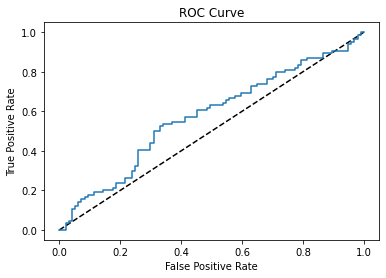

In [34]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [35]:
auc = roc_auc_score(y_test,y_pred_prob)
auc

0.5733922434953362

**KNN**

In [36]:
knn = KNeighborsClassifier()

In [42]:
knn.fit(X,y)

KNeighborsClassifier()

In [43]:
knn.score(X,y)

0.7011019283746557

In [44]:
knn.score(X_test,y_test)

0.4530386740331492

In [45]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = knn.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

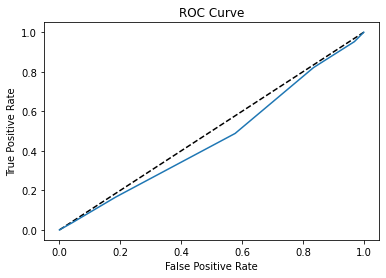

In [46]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [47]:
auc = roc_auc_score(y_test,y_pred_prob)
auc

0.46140157093765344

In [48]:
cmatrix = confusion_matrix(y_test,y_pred)
cmatrix

NameError: name 'y_pred' is not defined

<AxesSubplot:title={'center':'Matriz de confusão'}>

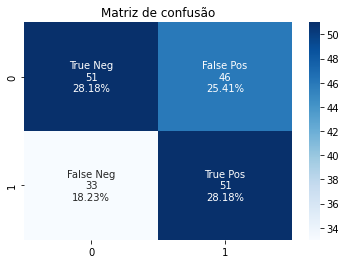

In [58]:
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cmatrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cmatrix.flatten()/np.sum(cmatrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.title('Matriz de confusão')
sns.heatmap(cmatrix, annot=labels, fmt='', cmap='Blues')

**Random Forest**

In [49]:
RF = RandomForestClassifier()

In [50]:
RF.fit(X,y)

RandomForestClassifier()

In [53]:
RF.score(X,y)

1.0

In [54]:
RF.score(X_test,y_test)

0.6464088397790055

In [55]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = RF.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

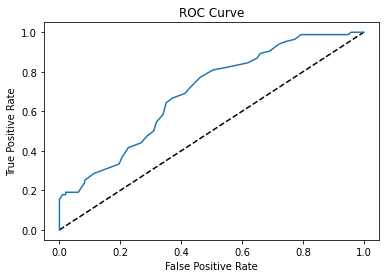

In [56]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [57]:
roc_auc_score(y_test,y_pred_prob)

0.6931148748159058

# **Optimizing Hyperparameters**

In [113]:
from sklearn.model_selection import RandomizedSearchCV

In [68]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [ ]:
RandomizedSearchCV()

In [62]:
from sklearn.model_selection import TimeSeriesSplit

In [63]:
tscv = TimeSeriesSplit()

In [64]:
tscv.split(X)

<generator object TimeSeriesSplit.split at 0x000001CB33A7AE40>

In [65]:
for train_index, val_index in tscv.split(X):
    print(f"train = {train_index},val_index = {val_index}")

train = [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120],val_index = [121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156
 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174
 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192
 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210
 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228
 229 230 231 232 233 234 235 236 237 238 239 240 2

In [ ]:
# versão modificada leave one out CV
# n_samples = 10

# Train      Test

# 1           10
# 2
# 3
# 4
# 5
# 6
# 7
# 8
# 9



# Train      Test

# 1           9
# 2
# 3
# 4
# 5
# 6
# 7
# 8


# Train      Test

# 1           8
# 2
# 3
# 4
# 5
# 6
# 7



In [114]:
train_scores = []
val_scores = []
hyper_params = []
#n_estimators,max_features
for max_depth_ in np.arange(1,100):
    for n_estimators_ in np.arange(10,110,10):
        for max_features_ in (None,"sqrt"):
            train_ = []
            val_ = []
            for train_index, val_index in tscv.split(X):
                #X = pd.DataFrame(X.iloc[train_index,:])
                #print("TRAIN:", train_index, "TEST:", test_index)
                rf = RandomForestClassifier(n_estimators=n_estimators_, 
                                            max_depth=max_depth_, 
                                            max_features=max_features_,
                                            random_state=42)
                #print(train_index,np.shape)
                X_train2, X_val2 = X.iloc[train_index,:], X.iloc[val_index,:]
                y_train2, y_val2 = y.iloc[train_index], y.iloc[val_index]
                rf.fit(X_train2,y_train2)
            #     y_train_pred = rf.predict(X_train2)
            #     y_val_pred = rf.predict(X_val2)
                train_.append(rf.score(X_train2,y_train2))
                val_.append(rf.score(X_val2,y_val2))
                
            train_scores.append(train_)    
            val_scores.append(val_)
            hyper_params.append((max_depth_,n_estimators_,max_features_))
            print(f"train mean = {np.mean(np.array(train_))},val mean = {np.mean(np.array(val_))}")




train mean = 0.6157851239669421,val mean = 0.5256198347107438
train mean = 0.6246831955922865,val mean = 0.5173553719008265
train mean = 0.6219834710743801,val mean = 0.5256198347107439
train mean = 0.6435537190082645,val mean = 0.5256198347107438
train mean = 0.6257024793388429,val mean = 0.5239669421487603
train mean = 0.6481542699724518,val mean = 0.4958677685950413
train mean = 0.6307988980716253,val mean = 0.5272727272727273
train mean = 0.6587052341597797,val mean = 0.5107438016528926
train mean = 0.6424793388429754,val mean = 0.5140495867768595
train mean = 0.6699173553719009,val mean = 0.5140495867768595
train mean = 0.6399999999999999,val mean = 0.5272727272727272
train mean = 0.6688980716253443,val mean = 0.5190082644628099
train mean = 0.6349035812672177,val mean = 0.5206611570247934
train mean = 0.6647382920110192,val mean = 0.5223140495867769
train mean = 0.6323140495867767,val mean = 0.5190082644628099
train mean = 0.6569972451790634,val mean = 0.5173553719008265
train me

train mean = 0.987107438016529,val mean = 0.5438016528925621
train mean = 0.9856749311294767,val mean = 0.547107438016529
train mean = 0.9889256198347107,val mean = 0.5421487603305785
train mean = 0.9879338842975207,val mean = 0.5487603305785124
train mean = 0.9898071625344352,val mean = 0.5355371900826447
train mean = 0.9905509641873278,val mean = 0.5504132231404959
train mean = 0.9898071625344352,val mean = 0.547107438016529
train mean = 0.9530303030303031,val mean = 0.5520661157024793
train mean = 0.9568595041322314,val mean = 0.5355371900826447
train mean = 0.9787052341597796,val mean = 0.5652892561983471
train mean = 0.9786225895316804,val mean = 0.5553719008264462
train mean = 0.9898898071625345,val mean = 0.5702479338842975
train mean = 0.9907162534435262,val mean = 0.5636363636363636
train mean = 0.9939944903581267,val mean = 0.5652892561983471
train mean = 0.9943526170798898,val mean = 0.5504132231404959
train mean = 0.9959779614325068,val mean = 0.5669421487603306
train mean 

train mean = 0.9938292011019284,val mean = 0.5768595041322313
train mean = 0.9982093663911847,val mean = 0.5454545454545454
train mean = 1.0,val mean = 0.5735537190082644
train mean = 1.0,val mean = 0.5520661157024793
train mean = 1.0,val mean = 0.5636363636363636
train mean = 1.0,val mean = 0.5652892561983471
train mean = 1.0,val mean = 0.5702479338842975
train mean = 1.0,val mean = 0.5487603305785125
train mean = 1.0,val mean = 0.5685950413223141
train mean = 1.0,val mean = 0.5338842975206612
train mean = 1.0,val mean = 0.5504132231404959
train mean = 1.0,val mean = 0.5239669421487604
train mean = 1.0,val mean = 0.5504132231404959
train mean = 1.0,val mean = 0.5272727272727273
train mean = 1.0,val mean = 0.5570247933884297
train mean = 1.0,val mean = 0.5371900826446282
train mean = 1.0,val mean = 0.5537190082644627
train mean = 1.0,val mean = 0.5553719008264463
train mean = 0.9788980716253443,val mean = 0.5504132231404959
train mean = 0.9815977961432507,val mean = 0.5239669421487603


train mean = 0.999586776859504,val mean = 0.5603305785123968
train mean = 1.0,val mean = 0.5586776859504132
train mean = 1.0,val mean = 0.5504132231404959
train mean = 1.0,val mean = 0.5702479338842975
train mean = 1.0,val mean = 0.5520661157024793
train mean = 1.0,val mean = 0.571900826446281
train mean = 1.0,val mean = 0.540495867768595
train mean = 1.0,val mean = 0.5603305785123966
train mean = 1.0,val mean = 0.5454545454545454
train mean = 1.0,val mean = 0.5603305785123968
train mean = 1.0,val mean = 0.5438016528925621
train mean = 1.0,val mean = 0.547107438016529
train mean = 1.0,val mean = 0.5355371900826447
train mean = 1.0,val mean = 0.5570247933884297
train mean = 1.0,val mean = 0.5454545454545455
train mean = 0.9799724517906336,val mean = 0.5520661157024793
train mean = 0.9814049586776861,val mean = 0.5206611570247934
train mean = 0.9941597796143252,val mean = 0.5636363636363636
train mean = 0.9970523415977961,val mean = 0.5338842975206612
train mean = 1.0,val mean = 0.566942

train mean = 1.0,val mean = 0.5504132231404959
train mean = 1.0,val mean = 0.5702479338842975
train mean = 1.0,val mean = 0.5520661157024793
train mean = 1.0,val mean = 0.571900826446281
train mean = 1.0,val mean = 0.540495867768595
train mean = 1.0,val mean = 0.5603305785123966
train mean = 1.0,val mean = 0.5454545454545454
train mean = 1.0,val mean = 0.5603305785123968
train mean = 1.0,val mean = 0.5438016528925621
train mean = 1.0,val mean = 0.547107438016529
train mean = 1.0,val mean = 0.5355371900826447
train mean = 1.0,val mean = 0.5570247933884297
train mean = 1.0,val mean = 0.5454545454545455
train mean = 0.9799724517906336,val mean = 0.5520661157024793
train mean = 0.9814049586776861,val mean = 0.5206611570247934
train mean = 0.9941597796143252,val mean = 0.5636363636363636
train mean = 0.9970523415977961,val mean = 0.5338842975206612
train mean = 1.0,val mean = 0.5669421487603306
train mean = 0.999586776859504,val mean = 0.5603305785123968
train mean = 1.0,val mean = 0.558677

train mean = 1.0,val mean = 0.571900826446281
train mean = 1.0,val mean = 0.540495867768595
train mean = 1.0,val mean = 0.5603305785123966
train mean = 1.0,val mean = 0.5454545454545454
train mean = 1.0,val mean = 0.5603305785123968
train mean = 1.0,val mean = 0.5438016528925621
train mean = 1.0,val mean = 0.547107438016529
train mean = 1.0,val mean = 0.5355371900826447
train mean = 1.0,val mean = 0.5570247933884297
train mean = 1.0,val mean = 0.5454545454545455
train mean = 0.9799724517906336,val mean = 0.5520661157024793
train mean = 0.9814049586776861,val mean = 0.5206611570247934
train mean = 0.9941597796143252,val mean = 0.5636363636363636
train mean = 0.9970523415977961,val mean = 0.5338842975206612
train mean = 1.0,val mean = 0.5669421487603306
train mean = 0.999586776859504,val mean = 0.5603305785123968
train mean = 1.0,val mean = 0.5586776859504132
train mean = 1.0,val mean = 0.5504132231404959
train mean = 1.0,val mean = 0.5702479338842975
train mean = 1.0,val mean = 0.552066

train mean = 1.0,val mean = 0.5454545454545454
train mean = 1.0,val mean = 0.5603305785123968
train mean = 1.0,val mean = 0.5438016528925621
train mean = 1.0,val mean = 0.547107438016529
train mean = 1.0,val mean = 0.5355371900826447
train mean = 1.0,val mean = 0.5570247933884297
train mean = 1.0,val mean = 0.5454545454545455
train mean = 0.9799724517906336,val mean = 0.5520661157024793
train mean = 0.9814049586776861,val mean = 0.5206611570247934
train mean = 0.9941597796143252,val mean = 0.5636363636363636
train mean = 0.9970523415977961,val mean = 0.5338842975206612
train mean = 1.0,val mean = 0.5669421487603306
train mean = 0.999586776859504,val mean = 0.5603305785123968
train mean = 1.0,val mean = 0.5586776859504132
train mean = 1.0,val mean = 0.5504132231404959
train mean = 1.0,val mean = 0.5702479338842975
train mean = 1.0,val mean = 0.5520661157024793
train mean = 1.0,val mean = 0.571900826446281
train mean = 1.0,val mean = 0.540495867768595
train mean = 1.0,val mean = 0.560330

train mean = 1.0,val mean = 0.547107438016529
train mean = 1.0,val mean = 0.5355371900826447
train mean = 1.0,val mean = 0.5570247933884297
train mean = 1.0,val mean = 0.5454545454545455
train mean = 0.9799724517906336,val mean = 0.5520661157024793
train mean = 0.9814049586776861,val mean = 0.5206611570247934
train mean = 0.9941597796143252,val mean = 0.5636363636363636
train mean = 0.9970523415977961,val mean = 0.5338842975206612
train mean = 1.0,val mean = 0.5669421487603306
train mean = 0.999586776859504,val mean = 0.5603305785123968
train mean = 1.0,val mean = 0.5586776859504132
train mean = 1.0,val mean = 0.5504132231404959
train mean = 1.0,val mean = 0.5702479338842975
train mean = 1.0,val mean = 0.5520661157024793
train mean = 1.0,val mean = 0.571900826446281
train mean = 1.0,val mean = 0.540495867768595
train mean = 1.0,val mean = 0.5603305785123966
train mean = 1.0,val mean = 0.5454545454545454
train mean = 1.0,val mean = 0.5603305785123968
train mean = 1.0,val mean = 0.543801

train mean = 1.0,val mean = 0.5454545454545455
train mean = 0.9799724517906336,val mean = 0.5520661157024793
train mean = 0.9814049586776861,val mean = 0.5206611570247934
train mean = 0.9941597796143252,val mean = 0.5636363636363636
train mean = 0.9970523415977961,val mean = 0.5338842975206612
train mean = 1.0,val mean = 0.5669421487603306
train mean = 0.999586776859504,val mean = 0.5603305785123968
train mean = 1.0,val mean = 0.5586776859504132
train mean = 1.0,val mean = 0.5504132231404959
train mean = 1.0,val mean = 0.5702479338842975
train mean = 1.0,val mean = 0.5520661157024793
train mean = 1.0,val mean = 0.571900826446281
train mean = 1.0,val mean = 0.540495867768595
train mean = 1.0,val mean = 0.5603305785123966
train mean = 1.0,val mean = 0.5454545454545454
train mean = 1.0,val mean = 0.5603305785123968
train mean = 1.0,val mean = 0.5438016528925621
train mean = 1.0,val mean = 0.547107438016529
train mean = 1.0,val mean = 0.5355371900826447
train mean = 1.0,val mean = 0.557024

train mean = 0.9814049586776861,val mean = 0.5206611570247934
train mean = 0.9941597796143252,val mean = 0.5636363636363636
train mean = 0.9970523415977961,val mean = 0.5338842975206612
train mean = 1.0,val mean = 0.5669421487603306
train mean = 0.999586776859504,val mean = 0.5603305785123968
train mean = 1.0,val mean = 0.5586776859504132
train mean = 1.0,val mean = 0.5504132231404959
train mean = 1.0,val mean = 0.5702479338842975
train mean = 1.0,val mean = 0.5520661157024793
train mean = 1.0,val mean = 0.571900826446281
train mean = 1.0,val mean = 0.540495867768595
train mean = 1.0,val mean = 0.5603305785123966
train mean = 1.0,val mean = 0.5454545454545454
train mean = 1.0,val mean = 0.5603305785123968
train mean = 1.0,val mean = 0.5438016528925621
train mean = 1.0,val mean = 0.547107438016529
train mean = 1.0,val mean = 0.5355371900826447
train mean = 1.0,val mean = 0.5570247933884297
train mean = 1.0,val mean = 0.5454545454545455
train mean = 0.9799724517906336,val mean = 0.552066

train mean = 0.9970523415977961,val mean = 0.5338842975206612
train mean = 1.0,val mean = 0.5669421487603306
train mean = 0.999586776859504,val mean = 0.5603305785123968
train mean = 1.0,val mean = 0.5586776859504132
train mean = 1.0,val mean = 0.5504132231404959
train mean = 1.0,val mean = 0.5702479338842975
train mean = 1.0,val mean = 0.5520661157024793
train mean = 1.0,val mean = 0.571900826446281
train mean = 1.0,val mean = 0.540495867768595
train mean = 1.0,val mean = 0.5603305785123966
train mean = 1.0,val mean = 0.5454545454545454
train mean = 1.0,val mean = 0.5603305785123968
train mean = 1.0,val mean = 0.5438016528925621
train mean = 1.0,val mean = 0.547107438016529
train mean = 1.0,val mean = 0.5355371900826447
train mean = 1.0,val mean = 0.5570247933884297
train mean = 1.0,val mean = 0.5454545454545455
train mean = 0.9799724517906336,val mean = 0.5520661157024793
train mean = 0.9814049586776861,val mean = 0.5206611570247934
train mean = 0.9941597796143252,val mean = 0.563636

train mean = 0.999586776859504,val mean = 0.5603305785123968
train mean = 1.0,val mean = 0.5586776859504132
train mean = 1.0,val mean = 0.5504132231404959
train mean = 1.0,val mean = 0.5702479338842975
train mean = 1.0,val mean = 0.5520661157024793
train mean = 1.0,val mean = 0.571900826446281
train mean = 1.0,val mean = 0.540495867768595
train mean = 1.0,val mean = 0.5603305785123966
train mean = 1.0,val mean = 0.5454545454545454
train mean = 1.0,val mean = 0.5603305785123968
train mean = 1.0,val mean = 0.5438016528925621
train mean = 1.0,val mean = 0.547107438016529
train mean = 1.0,val mean = 0.5355371900826447
train mean = 1.0,val mean = 0.5570247933884297
train mean = 1.0,val mean = 0.5454545454545455
train mean = 0.9799724517906336,val mean = 0.5520661157024793
train mean = 0.9814049586776861,val mean = 0.5206611570247934
train mean = 0.9941597796143252,val mean = 0.5636363636363636
train mean = 0.9970523415977961,val mean = 0.5338842975206612
train mean = 1.0,val mean = 0.566942

train mean = 1.0,val mean = 0.5504132231404959
train mean = 1.0,val mean = 0.5702479338842975
train mean = 1.0,val mean = 0.5520661157024793
train mean = 1.0,val mean = 0.571900826446281
train mean = 1.0,val mean = 0.540495867768595
train mean = 1.0,val mean = 0.5603305785123966
train mean = 1.0,val mean = 0.5454545454545454
train mean = 1.0,val mean = 0.5603305785123968
train mean = 1.0,val mean = 0.5438016528925621
train mean = 1.0,val mean = 0.547107438016529
train mean = 1.0,val mean = 0.5355371900826447
train mean = 1.0,val mean = 0.5570247933884297
train mean = 1.0,val mean = 0.5454545454545455
train mean = 0.9799724517906336,val mean = 0.5520661157024793
train mean = 0.9814049586776861,val mean = 0.5206611570247934
train mean = 0.9941597796143252,val mean = 0.5636363636363636
train mean = 0.9970523415977961,val mean = 0.5338842975206612
train mean = 1.0,val mean = 0.5669421487603306
train mean = 0.999586776859504,val mean = 0.5603305785123968
train mean = 1.0,val mean = 0.558677

In [119]:
mean_arr_val = []
for arr in val_scores:
    mean_arr_val.append(np.mean(arr))
print(max(mean_arr_val))

0.5867768595041324


In [118]:
len(val_scores)

1980

In [120]:
arr2 = np.array(mean_arr_val)
arr2#[mean_arr_val == 0.5867768595041324]

array([0.52561983, 0.51735537, 0.52561983, ..., 0.53553719, 0.55702479,
       0.54545455])

In [121]:
arr2[arr2 > 0.58]

array([0.58016529, 0.58677686, 0.58016529, 0.58181818])

In [122]:
np.where(arr2 > 0.58)

(array([110, 122, 250, 262], dtype=int64),)

In [123]:
hyper_params[122]

(7, 20, None)

In [129]:
hyper_params[250]

(13, 60, None)

In [156]:
RF2 = RandomForestClassifier(n_estimators=20,
                             max_depth = 7,
                             max_features = None,
                             random_state = 42)

In [157]:
RF2.fit(X,y)

RandomForestClassifier(max_depth=7, max_features=None, n_estimators=20,
                       random_state=42)

In [158]:
#train_score
RF2.score(X,y)

0.9077134986225895

In [159]:
#test_score
RF2.score(X_test,y_test)

0.6022099447513812

In [111]:
def range_splitter(n_samples,iterations):
    both_indexes = []
    for i in range(iterations):
        test_index = n_samples -  i - 1
        train_index_list = np.arange(0,test_index)
        test_index_list = np.array([test_index])
        both_indexes.append([train_index_list,test_index_list])
    return both_indexes

In [112]:
range_splitter(8,5)

[[array([0, 1, 2, 3, 4, 5, 6]), array([7])],
 [array([0, 1, 2, 3, 4, 5]), array([6])],
 [array([0, 1, 2, 3, 4]), array([5])],
 [array([0, 1, 2, 3]), array([4])],
 [array([0, 1, 2]), array([3])]]

In [ ]:
#n_estimators,max_features

In [69]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = RF, 
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               cv = , 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [93]:
# train_scores = []
# val_scores = []

# for train_index, val_index in tscv.split(X):
#     #print("TRAIN:", train_index, "TEST:", test_index)
#     #print(type(train_index))
#     rf = RandomForestClassifier(n_estimators=100, max_depth=3, max_features='auto',random_state=42)
#     train_index_list = list(train_index)
#     val_index_list = list(val_index)
#     X_train2, X_val2 = X[train_index_list[0]:train_index_list[-1]], X[val_index_list[0]:val_index_list[-1]]
#     y_train2, y_val2 = y[train_index_list[0]:train_index_list[-1]], y[val_index_list[0]:val_index_list[-1]]
#     rf.fit(X_train2,y_train2)
# #     y_train_pred = rf.predict(X_train2)
# #     y_val_pred = rf.predict(X_val2)
#     train_scores.append(rf.score(X_train2,y_train2))
#     val_scores.append(rf.score(X_val2,y_val2))

# print(f"train mean = {np.mean(np.array(train_scores))},test mean = {np.mean(np.array(val_scores))}")

